In [2]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rc('font', family = 'AppleGothic')
plt.rc('font', size = 12)
plt.rc('axes', unicode_minus = False)

In [3]:
data = pd.read_csv('mtcars.csv')
df = pd.DataFrame(data)

In [4]:
df.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [13]:
df.tail()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
27,Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.9,1,1,5,2
28,Ford Pantera L,15.8,8,351.0,264,4.22,3.170,14.5,0,1,5,4
29,Ferrari Dino,19.7,6,145.0,175,3.62,2.770,15.5,0,1,5,6
30,Maserati Bora,15.0,8,301.0,335,3.54,3.570,14.6,0,1,5,8
31,Volvo 142E,21.4,4,121.0,109,4.11,2.780,18.6,1,1,4,2


In [7]:
df.shape

(32, 12)

In [99]:
df.columns

Index(['Unnamed: 0', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs',
       'am', 'gear', 'carb'],
      dtype='object')

In [100]:
df.rename(columns={'Unnamed: 0':'car'}, inplace=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   car     32 non-null     object 
 1   mpg     32 non-null     float64
 2   cyl     32 non-null     int64  
 3   disp    32 non-null     float64
 4   hp      32 non-null     int64  
 5   drat    32 non-null     float64
 6   wt      32 non-null     float64
 7   qsec    32 non-null     float64
 8   vs      32 non-null     int64  
 9   am      32 non-null     int64  
 10  gear    32 non-null     int64  
 11  carb    32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [20]:
df.dtypes

car      object
mpg     float64
cyl       int64
disp    float64
hp        int64
drat    float64
wt      float64
qsec    float64
vs        int64
am        int64
gear      int64
carb      int64
dtype: object

In [21]:
df.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [31]:
'''
df['gear'].value_counts()
df['am'].value_counts() # 종류 별로 개수 세는 거라고 생각했는데 값의 종류가 몇 개인지만 구하면 되므로 value_counts 말고 unique를 쓰기로 했다.
'''

am
0    19
1    13
Name: count, dtype: int64

In [228]:
# gear, transmission features에는 각각 몇가지 값이 있는지를 출력하세요.

print(len(df['gear'].unique())) # gear 값 종류 개수

print(len(df['am'].unique())) # transmission 값 종류 개수


am,0,1
gear,,
3,15,0
4,4,8
5,0,5


3
2


am,0,1
gear,,
3,15,0
4,4,8
5,0,5


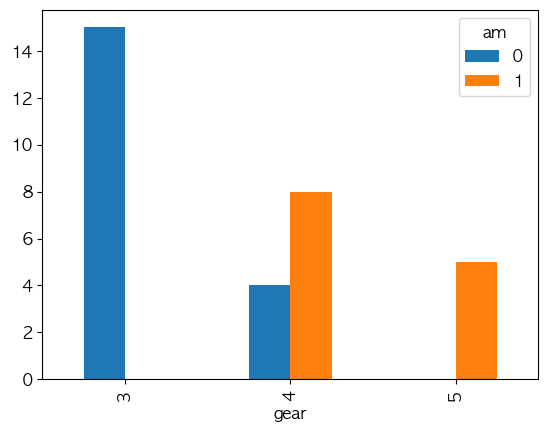

gear  am
3     0     15
4     0      4
      1      8
5     1      5
dtype: int64

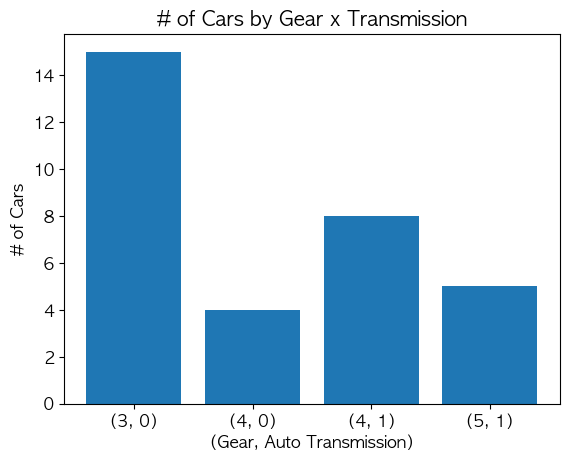

In [8]:
# gear와 transmission의 경우의 수 조합별로 나누고 각 조합에 몇개의 차량이 있는지를 알아내세요.
# 먼저 결과값을 화면에 출력하세요.

# 1. Pandas.crosstab method
crosstab = pd.crosstab(df.gear, df.am)
display(crosstab)
crosstab.plot(kind='bar')
plt.show()

# 2. Pandas.crosstab method 사용 X
grouped = df.groupby(['gear', 'am']).size()
display(grouped)

# 결과값을 바 그래프로 그리세요. 타이틀은 '# of Cars by Gear x Transmission'로, x축 레이블은 '(Gear, Auto Transmission)', y축 레이블은 '# of Cars'로 만드세요.
X = []
for g, a in grouped.index:
    X.append(str((g, a)))

Y = []
for c in grouped.values:
    Y.append(c)

#plotting
plt.bar(X, Y)
plt.title('# of Cars by Gear x Transmission')
plt.xlabel('(Gear, Auto Transmission)')
plt.ylabel('# of Cars')
plt.show()

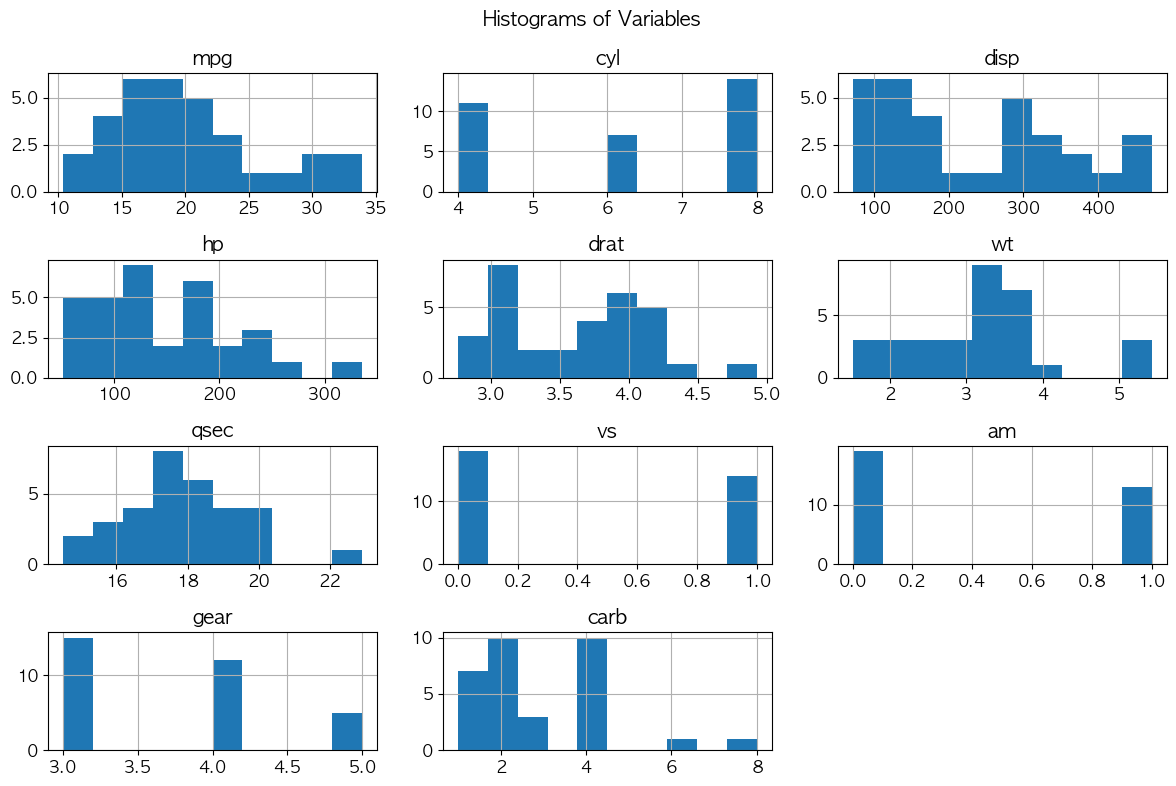

In [188]:
#데이터셋에 포함된 모든 features의 히스토그램을 그리세요.
#그래프 타이틀은 "Histograms of Variables"로 하세요.
#최대한 잘 보이도록 그래프들을 배치하세요.

#subplot 사용하기

plt.tight_layout()
for i, name in enumerate(df.columns):
    if i == 0:
        continue
    plt.subplot(4,3,i)
    plt.title(name)
    df[name].hist(bins=10, figsize=(12,8))

plt.suptitle('Histograms of Variables')
plt.tight_layout()
plt.show()

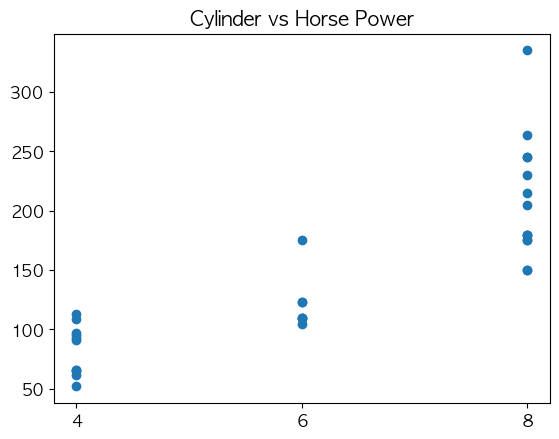

In [243]:
# Cylinder와 HorsePower 간의 상관 관계를 알아보기 위해 scatter 차트를 그리세요.
# 그래프 타이틀은 "Cylinder vs Horse Power"로 하세요.

plt.scatter(df['cyl'], df['hp'])
plt.xticks(range(4, 9, 2))
plt.title('Cylinder vs Horse Power')
plt.show()

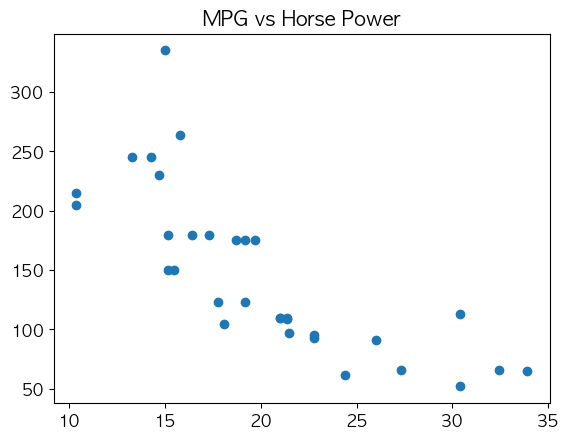

In [244]:
# MPG와 HorsePower 간의 상관 관계를 알아보기 위해 scatter 차트를 그리세요.
# 그래프 타이틀은 "MPG vs Horse Power"로 하세요.

plt.scatter(df['mpg'], df['hp'])
plt.title('MPG vs Horse Power')
plt.show()

In [245]:
# 각 변수들 간의 상관 관계를 알아 보기 위해 상관계수를 구하는 표를 출력하세요.

df1 = df.drop('car', axis = 1) # 차종명은 String이므로 제외
display(df1.corr())

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659,0.418684,0.664039,0.599832,0.480285,-0.550925
cyl,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988
disp,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977
hp,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812
drat,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790
wt,-0.867659,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606
qsec,0.418684,-0.591242,-0.433698,-0.708223,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249
vs,0.664039,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607
am,0.599832,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534
gear,0.480285,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073


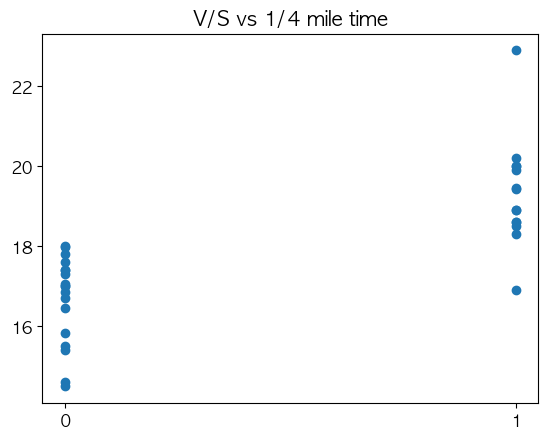

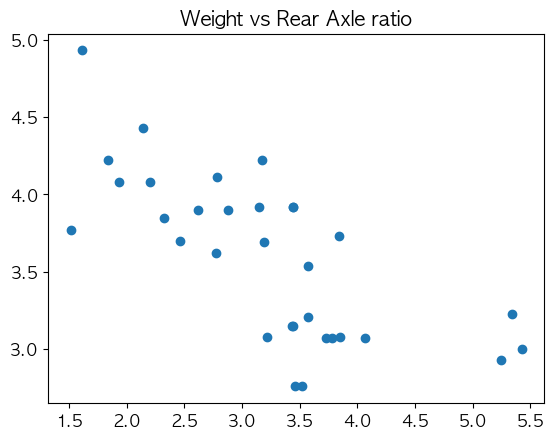

In [250]:
# 이런 데이터셋을 분석해서 얻을 수 있는 경제적 가치는 무엇일까요? 어떤 비즈니스 상황에서 이런 데이터셋을 분석해서 어떤 경제적 가치를 얻을 수 있을까요?
'''
1. 실제 차량 판매량을 해당 데이터셋에 추가하면
 (1) 차량 판매량과 각 attribute의 상관 관계를 구해 일반적인 소비자들이 차량을 구매할 때 어떤 attribute를 중점적으로 고려하는지 알 수 있음
 (2) 차량 판매량과 대당 순이익을 곱해 각 attribute와 상관 관계를 구하면 어떤 attribute를 중점적으로 중요하게 설계하는지에 따라 기업 입장에서 이익이 되는지 알 수 있음

2. Histograms of Variables를 통해 시장에서 유통되는 차량들의 attribute가 어떤 경향성을 띄는지 알 수 있고, 이를 통해 기업 입장에서 틈새 시장을 노리거나 특정 attribute가 유리함을 파악할 수 있음
'''
# 변수들 간의 상관 관계가 높은 조합을 임의로 2개 선택해서 해당 데이터 간의 상관 관계를 그래프로 그리고 어떤 결론을 내릴 수 있는지를 토의하세요.

'''
양의 상관 관계
vs - qsec

음의 상관 관계
drat - wt

'''

plt.title('V/S vs 1/4 mile time')
plt.xticks(range(0,2))
plt.scatter(df['vs'],df['qsec'])
plt.show()

plt.title('Weight vs Rear Axle ratio')
plt.scatter(df['wt'],df['drat'])
plt.show()